In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

In [2]:
filename = 'C:/Users/yyoon.ces/Downloads/histograms.npy'
data = np.load(filename)

In [3]:
np.shape(data)

(30, 125, 10, 25, 4)

In [4]:
first_pattern = []

for i in range(10):
    first_pattern.append(data[0, 0, i]) # extract the first simulation pattern of the first circuit

In [5]:
np.shape(first_pattern) # ten repetitions, 25 time units, 4 repetitions

(10, 25, 4)

In [6]:
first_pattern[0]

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00666667, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00666667, 0.        , 0.        ],
       [0.        , 0.        , 0.00666667, 0.00666667],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.00666667, 0.        , 0.00666667, 0.        ],
       [0.        , 0.        , 0.00666667, 0.        ],
       [0.        , 0.        , 0.00666667, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00666667, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [7]:
cs = np.transpose(first_pattern) # transpose the array into 4*25*10
np.shape(cs[0])
# cs[0], cs[1], cs[2], and cs[3] correspond to top left, top right, bottom right, and bottom left, resp.

(25, 10)

In [8]:
data_tl, data_tr, data_br, data_bl = cs[0], cs[1], cs[2], cs[3]

In [9]:
data_tl[2]

array([0.        , 0.        , 0.00666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [10]:
for i in range(25):
    for j in range(10):
        if data_tl[i][j] != 0:
            data_tl[i][j] = j + 1
            
        if data_tr[i][j] != 0:
            data_tr[i][j] = j + 1
            
        if data_br[i][j] != 0:
            data_br[i][j] = j + 1
            
        if data_bl[i][j] != 0:
            data_bl[i][j] = j + 1
        
        else:
            pass

In [11]:
lineoffsets1 = [i+1 for i in range(25)]
linelengths1 = [0.5 for i in range(25)]
color_set = ['blue', 'red', 'green', 'black']
x_range = np.linspace(1, 25, 25, endpoint=True)
axes_grp = ['axs', 'twin1', 'twin2', 'twin3']

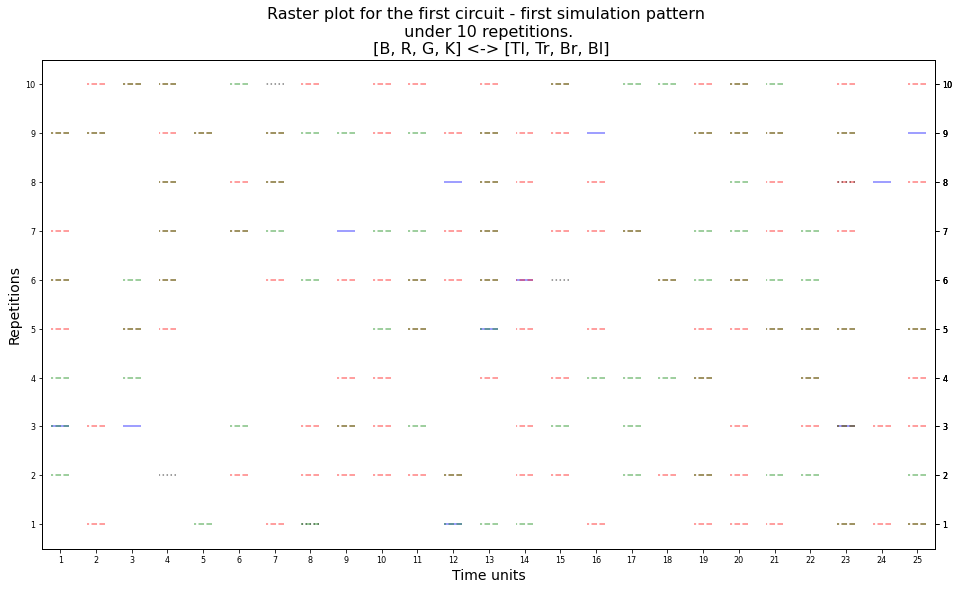

In [12]:
fig, axs = plt.subplots()
twin1, twin2, twin3 = axs.twinx(), axs.twinx(), axs.twinx()

axs.eventplot(data_tl, 
              colors=color_set[0], 
              lineoffsets=lineoffsets1, 
              linelengths=linelengths1,
              orientation='vertical',
              linestyles='solid',
              alpha=0.5)

twin1.eventplot(data_tr, 
                colors=color_set[1], 
                lineoffsets=lineoffsets1, 
                linelengths=linelengths1,
                orientation='vertical',
                linestyles='--',
                alpha=0.5)

twin2.eventplot(data_br, 
                colors=color_set[2], 
                lineoffsets=lineoffsets1, 
                linelengths=linelengths1,
                orientation='vertical',
                linestyles='dashed',
                alpha=0.5)

twin3.eventplot(data_bl, 
                colors=color_set[3], 
                lineoffsets=lineoffsets1, 
                linelengths=linelengths1,
                orientation='vertical',
                linestyles='dotted',
                alpha=0.5)

axs.set_xlim(0.5, 25.5)
axs.set_ylim(0.5, 10.5)
twin1.set_ylim(0.5, 10.5)
twin2.set_ylim(0.5, 10.5)
twin3.set_ylim(0.5, 10.5)

axs.set_xticks(x_range)
axs.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
twin1.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
twin2.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
twin3.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

axs.set_ylabel("Repetitions", fontsize = 14)
axs.set_xlabel("Time units", fontsize = 14)
axs.set_title("Raster plot for the first circuit - first simulation pattern \n under 10 repetitions. \n [B, R, G, K] <-> [Tl, Tr, Br, Bl]",
              fontsize = 16)

fig.set_size_inches(16, 9)
#fig.savefig('test.png', dpi=600)

# Recycle Bin

In [13]:
# trial_1 = group[0]
# color_tl, color_tr, color_bl, color_br = [], [], [], []

# for i in range(25):
#     for j in range(4):
#         if trial_1[i][j] == 0.0:
#             if j == 0:
#                 color_tl.append('white')
#             elif j == 1:
#                 color_tr.append('white')
#             elif j == 2:
#                 color_br.append('white')
#             else:
#                 color_bl.append('white')
#         else:
#             if j == 0:
#                 color_tl.append('blue')
#             elif j == 1:
#                 color_tr.append('red')
#             elif j == 2:
#                 color_br.append('green')
#             else:
#                 color_bl.append('black')

In [14]:
# axs.eventplot(data_tr, 
#               colors='red', 
#               lineoffsets=lineoffsets1, 
#               linelengths=linelengths1,
#               orientation='vertical')

# axs.eventplot(data_br, 
#               colors='green', 
#               lineoffsets=lineoffsets1, 
#               linelengths=linelengths1,
#               orientation='vertical')

# axs.eventplot(data_bl, 
#               colors='black', 
#               lineoffsets=lineoffsets1, 
#               linelengths=linelengths1,
#               orientation='vertical')